# Data Wrangling Project

## Objective
This notebook aims to analyze and clean datasets related to Forbes Billionaires, uncovering insights about wealth distribution, industries, demographics, and trends.

## Research Questions
1. Is there a clear correlation between age and net worth? Does net worth generally increase, decrease, or remain constant as individuals age?
2. What is top Countries By Average Net Worth?
3. What industries produce the most billionaires?

---

## Sections
1. **Data Import and Overview**: Load and describe datasets.
2. **Data Cleaning**: Handle missing values, duplicates, and inconsistencies.
3. **Exploratory Data Analysis (EDA)**: Visualize and summarize key insights.
4. **Feature Engineering**: Create meaningful derived features.
5. **Insights and Modeling**: Draw actionable conclusions and apply basic models.
6. **Conclusion**: Summarize findings and recommendations.


### Comparative Analysis of Billionaire Datasets (2023) & Forbes Billionaires

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this notebook, we will explore and analyze two prominent datasets related to the world's wealthiest individuals. The first dataset, "Forbes-Billionaires-Data-Analysis-2023.csv," was downloaded from the Forbes website and contains detailed information on the billionaires listed in 2023.

The second dataset, "Billionaires Statistics Dataset.csv," is sourced from Kaggle and provides additional insights into the global landscape of billionaires.

We will conduct a comparative analysis of these datasets, examining the differences in data coverage, attributes, and insights offered by each. This analysis aims to provide a holistic view of the world's wealthiest individuals, utilizing the strengths of both data sources to derive meaningful conclusions about wealth distribution, industry representation, and demographic information of billionaires worldwide.

## 1. Gather data


### **1.1.** Problem Statement
The problem focuses on analyzing the global wealth distribution and demographic trends among the world's wealthiest individuals. By using two datasets, "Forbes-Billionaires-Data-Analysis-2023.csv" from the Forbes website and "Billionaires Statistics Dataset.csv" from Kaggle, the project aims to examine patterns in net worth, industry representation, and geographic distribution. The objective is to identify insights such as the relationship between wealth and country-level indicators, gender disparities, and key industries driving billionaire wealth.

### **1.2.** Gather at least two datasets using downlaod and API




### **Dataset 1**
Load First data set as a csv file

Method: The data was gathered with manual download

Number of Entries: 2,607

Columns: 15

Dataset variables:

* Unnamed
* Image
* Rank
* Name
* Net_Worth
* Age
* Source
* Country
* Industry
* Sex
* Citizenship
* Marital Status
* Education
* College/University
* Empire

In [162]:

#FILL IN 1st data gathering and loading method
df_forbes = pd.read_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/Forbes-Billionaires-Data-Analysis.csv')
df_forbes.head(1)

,Unnamed: 0,Image,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire
0,0,https://specials-images.forbesimg.com/imageser...,1,Elon Musk,220.7,52.0,"Tesla, SpaceX",United States,Automotive,Male,United States,Single,Bachelor of Arts/Science,University of Pennsylvania,Self Made


### Dataset 2

Type: CSV File importent from kaggle
Name: Billionaires Statistics Dataset (2023)
Link: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

Method: The data was gathered using the "kagglehub API" method from kaggle.com.)

Number of Entries: 2,640

Columns: 35

Dataset variables:

* rank
* finalWorth
* category
* personName
* age
* country
* city
* source
* industries
* countryOfCitizenship
* cpi_change_country
* gdp_country
* gross_tertiary_education_enrollment
* gross_primary_education_enrollment_country
* life_expectancy_country
* tax_revenue_country_country
* total_tax_rate_country
* population_country
* latitude_country
* longitude_country

In [163]:
#FILL IN 2nd data gathering and loading method
# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/billionaires-statistics-dataset")
df_billionaires = pd.read_csv(path + "/Billionaires Statistics Dataset.csv")
df_billionaires.head()


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [164]:
#Optional: store the raw data in your local data store
df_billionaires.to_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/billionaires_data.csv', index=False) # Save to CSV
df_forbes.to_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/forbes_data.csv', index=False)  # Save to CSV





## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issues : Completeness and Inconsistent Data Types



**Forbes Dataset:**

### ***Inspecting the dataframe completeness visually***

*   A visual preview of the first few rows.
*   Structural details like column data types and counts.
*   Information about missing values.
*   Summary statistics for numerical data.
*   Insights into the diversity of data in each column.

In [165]:
# Display the first few rows to inspect the structure and values
df_forbes.head(10)

,Unnamed: 0,Image,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire
0,0,https://specials-images.forbesimg.com/imageser...,1,Elon Musk,220.7,52.0,"Tesla, SpaceX",United States,Automotive,Male,United States,Single,Bachelor of Arts/Science,University of Pennsylvania,Self Made
1,1,https://specials-images.forbesimg.com/imageser...,2,Bernard Arnault,216.3,74.0,LVMH,France,Fashion & Retail,Male,France,Married,Bachelor of Arts/Science,Ecole Polytechnique de Paris,no data
2,2,https://specials-images.forbesimg.com/imageser...,3,Jeff Bezos,160.7,59.0,Amazon,United States,Technology,Male,United States,Engaged,Bachelor of Arts/Science,Princeton University,Self Made
3,3,https://specials-images.forbesimg.com/imageser...,4,Larry Ellison,145.7,78.0,Oracle,United States,Technology,Male,United States,In Relationship,Drop Out,University of Chicago,Self Made
4,4,https://specials-images.forbesimg.com/imageser...,5,Warren Buffett,119.1,92.0,Berkshire Hathaway,United States,Finance & Investments,Male,United States,"Widowed, Remarried",Master of Science,Columbia University,Self Made
5,5,https://specials-images.forbesimg.com/imageser...,6,Bill Gates,117.0,67.0,Microsoft,United States,Technology,Male,United States,Divorced,Drop Out,Harvard University,Self Made
6,6,https://specials-images.forbesimg.com/imageser...,7,Larry Page,110.2,50.0,Google,United States,Technology,Male,United States,Married,Master of Science,Stanford University,Self Made
7,7,https://specials-images.forbesimg.com/imageser...,8,Mark Zuckerberg,107.5,39.0,Facebook,United States,Technology,Male,United States,Married,Drop Out,Harvard University,Self Made
8,8,https://specials-images.forbesimg.com/imageser...,9,Sergey Brin,104.6,49.0,Google,United States,Technology,Male,United States,Separated,Master of Science,Stanford University,Self Made
9,9,https://specials-images.forbesimg.com/imageser...,10,Steve Ballmer,100.4,67.0,Microsoft,United States,Technology,Male,United States,Married,Bachelor of Arts/Science,Harvard University,Self Made


In [166]:
# Display sample data from dataframe
df_forbes.sample(10)

,Unnamed: 0,Image,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire
1392,1392,https://specials-images.forbesimg.com/imageser...,1391,Lim Kok Thay,2.2,71.0,Casinos,Malaysia,Gambling & Casinos,Male,Malaysia,Married,no data,Harvard Business School,no data
1706,1706,https://specials-images.forbesimg.com/imageser...,1705,Wu Yingming,1.7,56.0,Batteries,China,Energy,Male,China,no data,no data,no data,Self Made
243,243,https://specials-images.forbesimg.com/imageser...,244,Nathan Blecharczyk,8.8,40.0,Airbnb,United States,Technology,Male,United States,Married,Bachelor of Arts/Science,Harvard University,Self Made
146,146,https://specials-images.forbesimg.com/imageser...,147,Shahid Khan,11.9,73.0,Auto parts,United States,Automotive,Male,United States,Married,Bachelor of Arts/Science,Urbana-Champaign,Self Made
2345,2345,https://specials-images.forbesimg.com/imageser...,2344,George Jacob Muthoot,1.2,70.0,financial services,India,Finance & Investments,Male,India,Married,Bachelor of Science in Engineering,Manipal University,no data
797,797,https://specials-images.forbesimg.com/imageser...,796,Bob Gaglardi,3.7,82.0,Hotels,Canada,Real Estate,Male,Canada,Married,Bachelor of Engineering,Letourneau College,Self Made
62,62,https://specials-images.forbesimg.com/imageser...,63,Low Tuck Kwong,24.5,75.0,Coal,Indonesia,Energy,Male,Indonesia,Married,no data,no data,Self Made
1945,1945,https://specials-images.forbesimg.com/imageser...,1944,Timothy Springer,1.5,75.0,Biotech,United States,Healthcare,Male,United States,Married,Ph.D,Harvard University,Self Made
161,161,https://specials-images.forbesimg.com/imageser...,161,Dan Cathy,10.9,70.0,Chick-fil-A,United States,Food & Beverage,Male,United States,Married,Bachelor of Arts/Science,Georgia Southern University,no data
2285,2285,https://specials-images.forbesimg.com/imageser...,2284,Franziska Wuerbser,1.2,35.0,Kitchen appliances,Germany,Manufacturing,Female,Germany,Married,no data,no data,no data


In [167]:
# Display the summary information of the dataframe
df_forbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2607 non-null   int64  
 1   Image               2607 non-null   object 
 2   Rank                2607 non-null   int64  
 3   Name                2607 non-null   object 
 4   Net_Worth           2607 non-null   float64
 5   Age                 2552 non-null   float64
 6   Source              2607 non-null   object 
 7   Country             2607 non-null   object 
 8   Industry            2607 non-null   object 
 9   Sex                 2607 non-null   object 
 10  Citizenship         2607 non-null   object 
 11  Marital Status      2607 non-null   object 
 12  Education           2607 non-null   object 
 13  College/University  2607 non-null   object 
 14  Empire              2607 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 305.6

In [168]:
# Check for missing values
df_forbes.isnull().sum()

,0
Unnamed: 0,0
Image,0
Rank,0
Name,0
Net_Worth,0
Age,55
Source,0
Country,0
Industry,0
Sex,0


In [169]:
# Display descriptive statistics for numeric columns
df_forbes.describe()

,Unnamed: 0,Rank,Net_Worth,Age
count,2607.0000,2607.000000,2607.000000,2552.000000
mean,1303.0000,1302.381281,4.865401,65.469044
std,752.7204,752.086481,11.316878,13.376137
min,0.0000,1.000000,1.000000,19.000000
25%,651.5000,651.500000,1.500000,56.000000
50%,1303.0000,1302.000000,2.400000,66.000000
75%,1954.5000,1946.000000,4.350000,75.000000
max,2606.0000,2606.000000,220.700000,101.000000


In [170]:
#FILL IN - Inspecting the dataframe programmatically
df_forbes['Net_Worth'].value_counts()

,count
Net_Worth,
1.1,130
1.5,130
1.2,129
1.3,124
1.4,119
...,...
18.9,1
18.0,1
17.6,1


### Copletness Summary for df_forbes dataset



1.   The Age column has 55 missing entries
2.   Fields like Education and College/University include placeholder values like "no data."



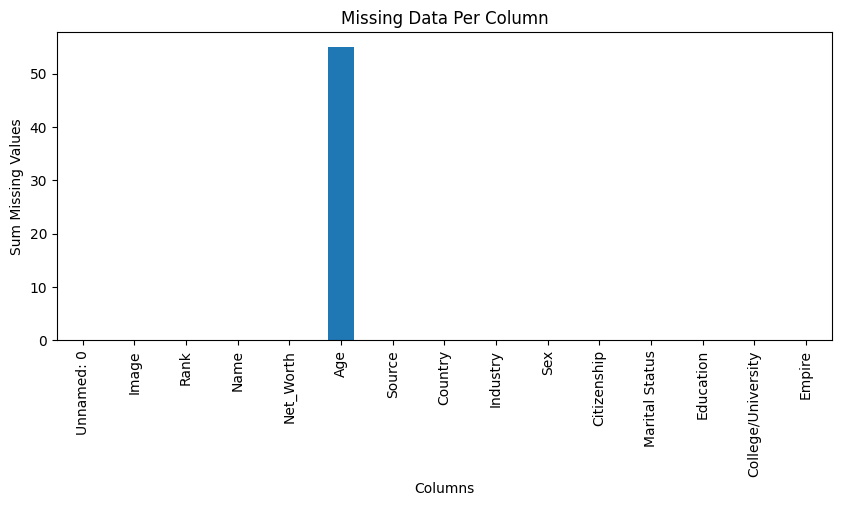

In [171]:
missing_data = df_forbes.isnull().sum()

plt.figure(figsize=(10, 4))
missing_data.plot(kind='bar')
plt.title("Missing Data Per Column")
plt.xlabel("Columns")
plt.ylabel("Sum Missing Values")
plt.show()

### **Billionaires Data set (df_billionaires)**:


In [172]:
# Display the first few rows to inspect the structure and values
df_billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [174]:
# Display the summary information of the dataframe
df_billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [175]:
# Check for missing values
df_billionaires.isnull().sum()

,0
rank,0
finalWorth,0
category,0
personName,0
age,65
country,38
city,72
source,0
industries,0
countryOfCitizenship,0


In [176]:
# Display descriptive statistics for numeric columns
df_billionaires.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [177]:
# Check for unique values in each column (optional for categorical insight)
for column in df_forbes.columns:
    print(f"Unique values in '{column}': {df_forbes[column].nunique()}")

Unique values in 'Unnamed: 0': 2607
Unique values in 'Image': 1799
Unique values in 'Rank': 2436
Unique values in 'Name': 2604
Unique values in 'Net_Worth': 218
Unique values in 'Age': 77
Unique values in 'Source': 980
Unique values in 'Country': 77
Unique values in 'Industry': 18
Unique values in 'Sex': 2
Unique values in 'Citizenship': 77
Unique values in 'Marital Status': 9
Unique values in 'Education': 44
Unique values in 'College/University': 648
Unique values in 'Empire': 2


In [178]:
def plot_duplicates_bar_chart(df):
    # Calculate duplicates for each column
    duplicates = df.apply(lambda x: x.duplicated().sum())

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    duplicates.plot(kind='bar', color='blue', edgecolor='black')

    plt.title('Duplicates per Column', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Sum of Duplicates', fontsize=12)

    # Show the plot
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

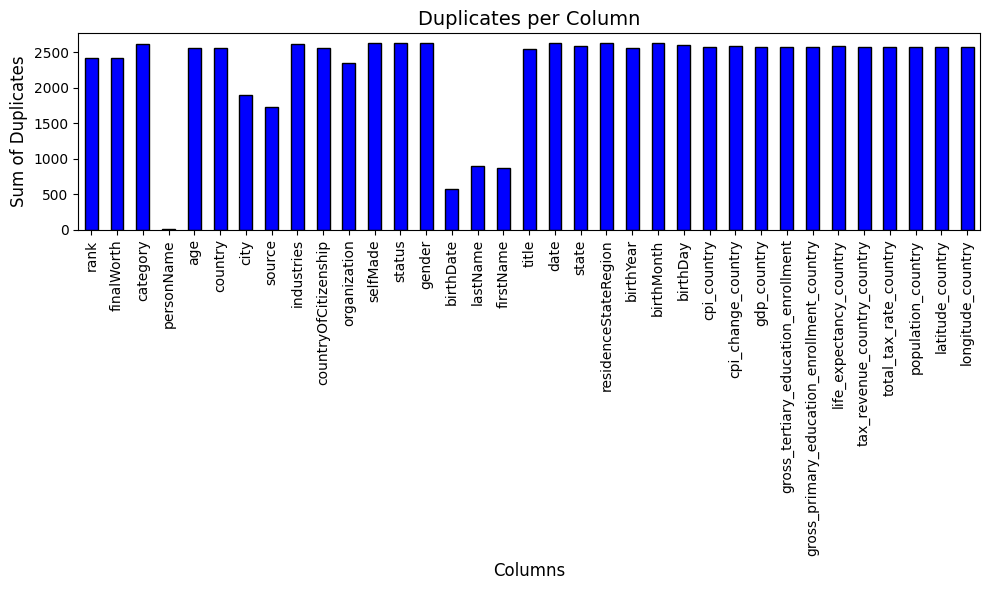

In [179]:
plot_duplicates_bar_chart(df_billionaires)

In [180]:
# Calculate the percentage of missing values for specific columns
organization_missing_percentage = (df_billionaires['organization'].isnull().sum() / len(df_billionaires)) * 100
title_missing_percentage = (df_billionaires['title'].isnull().sum() / len(df_billionaires)) * 100

# Display the issue
print(f"Issue: The 'organization' column has {organization_missing_percentage:.2f}% missing values, "
      f"and the 'title' column has {title_missing_percentage:.2f}% missing values.")

Issue: The 'organization' column has 87.69% missing values, and the 'title' column has 87.16% missing values.


In [181]:
# Calculate the percentage of missing values for residenceStateRegion and state columns
residence_state_missing_percentage = (df_billionaires['residenceStateRegion'].isnull().sum() / len(df_billionaires)) * 100
state_missing_percentage = (df_billionaires['state'].isnull().sum() / len(df_billionaires)) * 100

# Display the issue
print(f"Issue: The 'residenceStateRegion' column has {residence_state_missing_percentage:.2f}% missing values, "
      f"and the 'state' column has {state_missing_percentage:.2f}% missing values. These columns have significant gaps in data.")

Issue: The 'residenceStateRegion' column has 71.70% missing values, and the 'state' column has 71.48% missing values. These columns have significant gaps in data.


### Data Quality Issues

1.  High Missing Values in organization and title Columns
  *   Issue: The organization column has 87.69% missing values, and the title column has 87.16% missing values.
  *   Justification: These columns provide minimal usable information due to the large number of missing entries. They should either be dropped or imputed based on the project's requirements.

2.   Partial Completeness in residenceStateRegion and state Columns
  *   Issue: residenceStateRegion (71.70% missing) and state (71.48% missing) columns have significant gaps in data.
  *   Justification: These fields might still hold regional significance for certain analyses (e.g., location-based patterns). Imputation or conditional analysis may be required for these columns.










### Tidiness Issue 1: Multiple values in a single column

In [185]:
#Show columns
print('Billionaires Dataset:')

df_billionaires.columns

Billionaires Dataset:


Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [186]:
print('Forbes Dataset:')
#Show columns
print('Forbes Dataset:')
df_forbes.columns

Forbes Dataset:
Forbes Dataset:


Index(['Unnamed: 0', 'Image', 'Rank', 'Name', 'Net_Worth', 'Age', 'Source',
       'Country', 'Industry', 'Sex', 'Citizenship', 'Marital Status',
       'Education', 'College/University', 'Empire'],
      dtype='object')


1.   Rank vs. rank, Name vs. personName, and Net_Worth vs. finalWorth.
2.   Forbes uses camel case (e.g., Net_Worth), while the Billionaires dataset uses snake case (e.g., finalWorth)






### **Justification**: Consistency in column names is essential for easier merging and readability.



### Tidiness Issue 2: Multiple values in a single column



**Description:** Some columns contain multiple values separated by delimiters (e.g., commas, semicolons), which violates the rule that each variable should form a single column.

Example: Column like source

In [187]:
df_billionaires.head()


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [188]:
df_forbes.head()

,Unnamed: 0,Image,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire
0,0,https://specials-images.forbesimg.com/imageser...,1,Elon Musk,220.7,52.0,"Tesla, SpaceX",United States,Automotive,Male,United States,Single,Bachelor of Arts/Science,University of Pennsylvania,Self Made
1,1,https://specials-images.forbesimg.com/imageser...,2,Bernard Arnault,216.3,74.0,LVMH,France,Fashion & Retail,Male,France,Married,Bachelor of Arts/Science,Ecole Polytechnique de Paris,no data
2,2,https://specials-images.forbesimg.com/imageser...,3,Jeff Bezos,160.7,59.0,Amazon,United States,Technology,Male,United States,Engaged,Bachelor of Arts/Science,Princeton University,Self Made
3,3,https://specials-images.forbesimg.com/imageser...,4,Larry Ellison,145.7,78.0,Oracle,United States,Technology,Male,United States,In Relationship,Drop Out,University of Chicago,Self Made
4,4,https://specials-images.forbesimg.com/imageser...,5,Warren Buffett,119.1,92.0,Berkshire Hathaway,United States,Finance & Investments,Male,United States,"Widowed, Remarried",Master of Science,Columbia University,Self Made


In [189]:
dfs = pd.DataFrame(df_forbes)

# Splitting the 'source' column into multiple columns
split_sources = dfs['Source'].str.split(',', expand=True)

# Renaming the new columns
split_sources.columns = [f'source_{i+1}' for i in range(split_sources.shape[1])]

# Combine with the original DataFrame
df_forbes = pd.concat([df_forbes, split_sources], axis=1)
df_forbes.head()

,Unnamed: 0,Image,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire,source_1,source_2,source_3
0,0,https://specials-images.forbesimg.com/imageser...,1,Elon Musk,220.7,52.0,"Tesla, SpaceX",United States,Automotive,Male,United States,Single,Bachelor of Arts/Science,University of Pennsylvania,Self Made,Tesla,SpaceX,None
1,1,https://specials-images.forbesimg.com/imageser...,2,Bernard Arnault,216.3,74.0,LVMH,France,Fashion & Retail,Male,France,Married,Bachelor of Arts/Science,Ecole Polytechnique de Paris,no data,LVMH,None,None
2,2,https://specials-images.forbesimg.com/imageser...,3,Jeff Bezos,160.7,59.0,Amazon,United States,Technology,Male,United States,Engaged,Bachelor of Arts/Science,Princeton University,Self Made,Amazon,None,None
3,3,https://specials-images.forbesimg.com/imageser...,4,Larry Ellison,145.7,78.0,Oracle,United States,Technology,Male,United States,In Relationship,Drop Out,University of Chicago,Self Made,Oracle,None,None
4,4,https://specials-images.forbesimg.com/imageser...,5,Warren Buffett,119.1,92.0,Berkshire Hathaway,United States,Finance & Investments,Male,United States,"Widowed, Remarried",Master of Science,Columbia University,Self Made,Berkshire Hathaway,None,None


In [190]:
dfsb = pd.DataFrame(df_billionaires)

# Splitting the 'source' column into multiple columns
split_sources_b = dfsb['source'].str.split(',', expand=True)

# Renaming the new columns
split_sources_b.columns = [f'source_{i+1}' for i in range(split_sources_b.shape[1])]

# Combine with the original DataFrame
df_billionaires = pd.concat([df_billionaires, split_sources_b], axis=1)
df_billionaires.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,source_1,source_2,source_3
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,LVMH,None,None
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,Tesla,SpaceX,None
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,Amazon,None,None
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,Oracle,None,None
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,Berkshire Hathaway,None,None


***Justification:*** Multiple values in a single column can lead to ambiguity when analyzing or visualizing the data.



***Resolution:*** Split these columns into multiple columns or tables, each containing one distinct variable.

### Tidiness Issue 3: Redundant Columns

* **Forbes Dataset**: Columns like Image and Unnamed: 0 seem unnecessary for analysis.

* **Billionaires Dataset**: Columns such as birthMonth, birthDay, and birthDate might be combined or dropped depending on their usage.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [191]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes
# are not impacted

df_forbes_clean = df_forbes.copy()
df_billionaires_clean = df_billionaires.copy()

### **Quality Issue 1: High Missing and unneeded cloumns**

In [192]:
# For df_forbes_cleanwe need to remove these cloumns (Unnamed: 0, Image) bacuse it is not used

# Remove unnecessary columns
df_forbes_clean = df_forbes_clean.drop(columns=['Unnamed: 0', 'Image'])

# Display the updated DataFrame to confirm the changes
df_forbes_clean.head()

,Rank,Name,Net_Worth,Age,Source,Country,Industry,Sex,Citizenship,Marital Status,Education,College/University,Empire,source_1,source_2,source_3
0,1,Elon Musk,220.7,52.0,"Tesla, SpaceX",United States,Automotive,Male,United States,Single,Bachelor of Arts/Science,University of Pennsylvania,Self Made,Tesla,SpaceX,None
1,2,Bernard Arnault,216.3,74.0,LVMH,France,Fashion & Retail,Male,France,Married,Bachelor of Arts/Science,Ecole Polytechnique de Paris,no data,LVMH,None,None
2,3,Jeff Bezos,160.7,59.0,Amazon,United States,Technology,Male,United States,Engaged,Bachelor of Arts/Science,Princeton University,Self Made,Amazon,None,None
3,4,Larry Ellison,145.7,78.0,Oracle,United States,Technology,Male,United States,In Relationship,Drop Out,University of Chicago,Self Made,Oracle,None,None
4,5,Warren Buffett,119.1,92.0,Berkshire Hathaway,United States,Finance & Investments,Male,United States,"Widowed, Remarried",Master of Science,Columbia University,Self Made,Berkshire Hathaway,None,None


In [193]:
# For df_billionaires_clean need to remove these cloumns (organization , title) beacuse of High Missing Values

# Drop the 'organization' and 'title' columns
df_billionaires_clean = df_billionaires_clean.drop(columns=['organization', 'title'])


In [194]:
# For df_billionaires_clean need to remove these cloumns (residenceStateRegion  , state, date ) beacuse they are not critical to this analysis

# Drop the specified columns
df_billionaires_clean = df_billionaires_clean.drop(columns=['residenceStateRegion', 'state', 'date', 'city', 'latitude_country', 'tax_revenue_country_country' , 'total_tax_rate_country', 'longitude_country'])

df_billionaires_clean.head()

,rank,finalWorth,category,personName,age,country,source,industries,countryOfCitizenship,selfMade,...,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,population_country,source_1,source_2,source_3
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,LVMH,Fashion & Retail,France,False,...,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,67059887.0,LVMH,None,None
1,2,180000,Automotive,Elon Musk,51.0,United States,"Tesla, SpaceX",Automotive,United States,True,...,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,328239523.0,Tesla,SpaceX,None
2,3,114000,Technology,Jeff Bezos,59.0,United States,Amazon,Technology,United States,True,...,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,328239523.0,Amazon,None,None
3,4,107000,Technology,Larry Ellison,78.0,United States,Oracle,Technology,United States,True,...,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,328239523.0,Oracle,None,None
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Berkshire Hathaway,Finance & Investments,United States,True,...,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,328239523.0,Berkshire Hathaway,None,None


**Action:** Removed these columns (organization, title, residenceStateRegion , state ).

**Justification:**
* Over 87% missing values make these columns unreliable and unnecessary.
* They are not critical to this analysis.

### **Quality Issue 2: Fill missing data**

In [195]:
# Fill missing 'Age' values with the median age
median_age = df_forbes_clean['Age'].median()
df_forbes_clean['Age'] = df_forbes_clean['Age'].fillna(median_age)

# Verify the cleaning by checking for missing values again
print(df_forbes_clean['Age'].isnull().sum())

0


In [196]:
# Check for missing values
df_forbes_clean.isnull().sum()

,0
Rank,0
Name,0
Net_Worth,0
Age,0
Source,0
Country,0
Industry,0
Sex,0
Citizenship,0
Marital Status,0


In [197]:
# Fill missing 'Age' values with the median age
median_age = df_billionaires_clean['age'].median()
df_billionaires_clean['age'] = df_billionaires_clean['age'].fillna(median_age)

# Verify the cleaning by checking for missing values again
print(df_billionaires_clean['age'].isnull().sum())

0


In [198]:
# Check for missing values
df_billionaires_clean.isnull().sum()

,0
rank,0
finalWorth,0
category,0
personName,0
age,0
country,38
source,0
industries,0
countryOfCitizenship,0
selfMade,0


*Justification*:
1.   Fill Missng age data with the median age
2.   Remove columns unreliable and unnecessary

### **Tidiness Issue 1: Converted the gdp_country column to numeric**

In [199]:
# Convert 'gdp_country' to numeric, handling non-numeric characters
df_billionaires_clean['gdp_country'] = df_billionaires_clean['gdp_country'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df_billionaires_clean['gdp_country'] = pd.to_numeric(df_billionaires_clean['gdp_country'], errors='coerce')
df_billionaires_clean.head()

,rank,finalWorth,category,personName,age,country,source,industries,countryOfCitizenship,selfMade,...,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,population_country,source_1,source_2,source_3
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,LVMH,Fashion & Retail,France,False,...,110.05,1.1,2.715518e+12,65.6,102.5,82.5,67059887.0,LVMH,None,None
1,2,180000,Automotive,Elon Musk,51.0,United States,"Tesla, SpaceX",Automotive,United States,True,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,328239523.0,Tesla,SpaceX,None
2,3,114000,Technology,Jeff Bezos,59.0,United States,Amazon,Technology,United States,True,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,328239523.0,Amazon,None,None
3,4,107000,Technology,Larry Ellison,78.0,United States,Oracle,Technology,United States,True,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,328239523.0,Oracle,None,None
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Berkshire Hathaway,Finance & Investments,United States,True,...,117.24,7.5,2.142770e+13,88.2,101.8,78.5,328239523.0,Berkshire Hathaway,None,None


*Justification*:


1.   Ensures  accurate calculations for GDP-related analysis.



### **Tidiness Issue 2: Mismatched Naming Conventions**

In [200]:
# Forbes dataset: Net_Worth (camel case with underscore).
# Billionaires dataset: finalWorth (snake case without underscores).

df_billionaires_clean.rename(columns={
    'netWorth': 'net_worth',
    'finalWorth': 'final_worth',
    'country_x': 'country_forbes',
    'country_y': 'country_billionaires',
    'industry': 'industry_forbes',
    'industries': 'industry_billionaires'
}, inplace=True)



In [201]:
# Rename all cloumns in df_forbes_clean to snake_case

def to_snake_case(name):
    import re
    name = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', name).lower()

for col in df_forbes_clean.columns:
    new_col = to_snake_case(col)
    df_forbes_clean.rename(columns={col:new_col},inplace=True)

In [202]:
df_billionaires_clean.columns

Index(['rank', 'final_worth', 'category', 'personName', 'age', 'country',
       'source', 'industry_billionaires', 'countryOfCitizenship', 'selfMade',
       'status', 'gender', 'birthDate', 'lastName', 'firstName', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'population_country', 'source_1', 'source_2', 'source_3'],
      dtype='object')

In [203]:
df_forbes_clean.columns

Index(['rank', 'name', 'net__worth', 'age', 'source', 'country', 'industry',
       'sex', 'citizenship', 'marital _status', 'education',
       'college/_university', 'empire', 'source_1', 'source_2', 'source_3'],
      dtype='object')

**Justification:** Standardize column names across the dataset to follow a consistent convention (e.g., snake case or camel case).

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [204]:
df_merged_clean = pd.merge(df_forbes_clean, df_billionaires_clean, on='rank', how='inner')
df_merged_clean = df_merged_clean.drop(columns=['countryOfCitizenship', 'selfMade',
       'status', 'gender', 'birthDate', 'lastName', 'firstName', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'population_country','education','source_x','college/_university', 'empire','net__worth', 'country_y', 'source_y', 'category', 'personName'])
# Display the first few rows of the merged DataFrame to verify the merge
df_merged_clean.head()


,rank,name,age_x,country_x,industry,sex,citizenship,marital _status,source_1_x,source_2_x,source_3_x,final_worth,age_y,industry_billionaires,source_1_y,source_2_y,source_3_y
0,1,Elon Musk,52.0,United States,Automotive,Male,United States,Single,Tesla,SpaceX,None,211000,74.0,Fashion & Retail,LVMH,None,None
1,2,Bernard Arnault,74.0,France,Fashion & Retail,Male,France,Married,LVMH,None,None,180000,51.0,Automotive,Tesla,SpaceX,None
2,3,Jeff Bezos,59.0,United States,Technology,Male,United States,Engaged,Amazon,None,None,114000,59.0,Technology,Amazon,None,None
3,4,Larry Ellison,78.0,United States,Technology,Male,United States,In Relationship,Oracle,None,None,107000,78.0,Technology,Oracle,None,None
4,5,Warren Buffett,92.0,United States,Finance & Investments,Male,United States,"Widowed, Remarried",Berkshire Hathaway,None,None,106000,92.0,Finance & Investments,Berkshire Hathaway,None,None


In [205]:
df_merged_clean.columns

Index(['rank', 'name', 'age_x', 'country_x', 'industry', 'sex', 'citizenship',
       'marital _status', 'source_1_x', 'source_2_x', 'source_3_x',
       'final_worth', 'age_y', 'industry_billionaires', 'source_1_y',
       'source_2_y', 'source_3_y'],
      dtype='object')

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [206]:
#FILL IN - saving data
df_forbes_clean.to_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/df_forbes_clean.csv', index=False)  # Save to CSV
df_billionaires_clean.to_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/df_billionaires_clean.csv', index=False)  # Save to CSV
df_merged_clean.to_csv('/content/drive/MyDrive/RealWorldDataWranglingwithPython/df_merged_clean.csv', index=False)  # Save to CSV

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 5. Answer the research question

### **5.1:** Define and answer the research question
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

## *1 - Research question:* Is there a clear correlation between age and net worth? Does net worth generally increase, decrease, or remain constant as individuals age?

Correlation between age and net worth: 0.028710742852540456


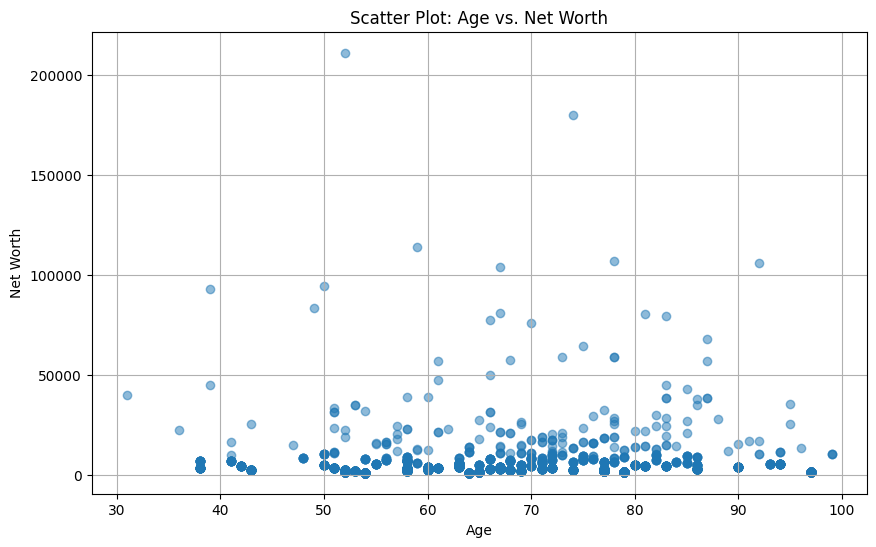

In [207]:
correlation = df_merged_clean['age_x'].corr(df_merged_clean['final_worth'])
print(f"Correlation between age and net worth: {correlation}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_clean['age_x'], df_merged_clean['final_worth'], alpha=0.5)
plt.title('Scatter Plot: Age vs. Net Worth')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.grid(True)
plt.show()

#Further analysis (optional) - group by age ranges and compare average net worth
# Create age bins
age_bins = [0, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_merged_clean['age_group'] = pd.cut(df_merged_clean['age_x'], bins=age_bins, labels=age_labels, right=False)



### The correlation coefficient between age and net worth is approximately 0.02, indicating a very weak positive relationship. This suggests:

* **No strong correlation:** Net worth does not significantly increase or decrease with age.
* **High variability:** There are likely other factors (e.g., industry, country, or source of wealth) that play a more substantial role in determining net worth than age alone.


*Research question:* ## What is top Countries By Average Net Worth?

---




country_x
Spain             68000.000000
Austria           40100.000000
Mexico            40066.666667
Indonesia         24100.000000
Chile             22000.000000
Russia            19930.000000
Czech Republic    16200.000000
Brazil            16180.000000
Netherlands       14500.000000
Cyprus            13475.000000
Name: final_worth, dtype: float64


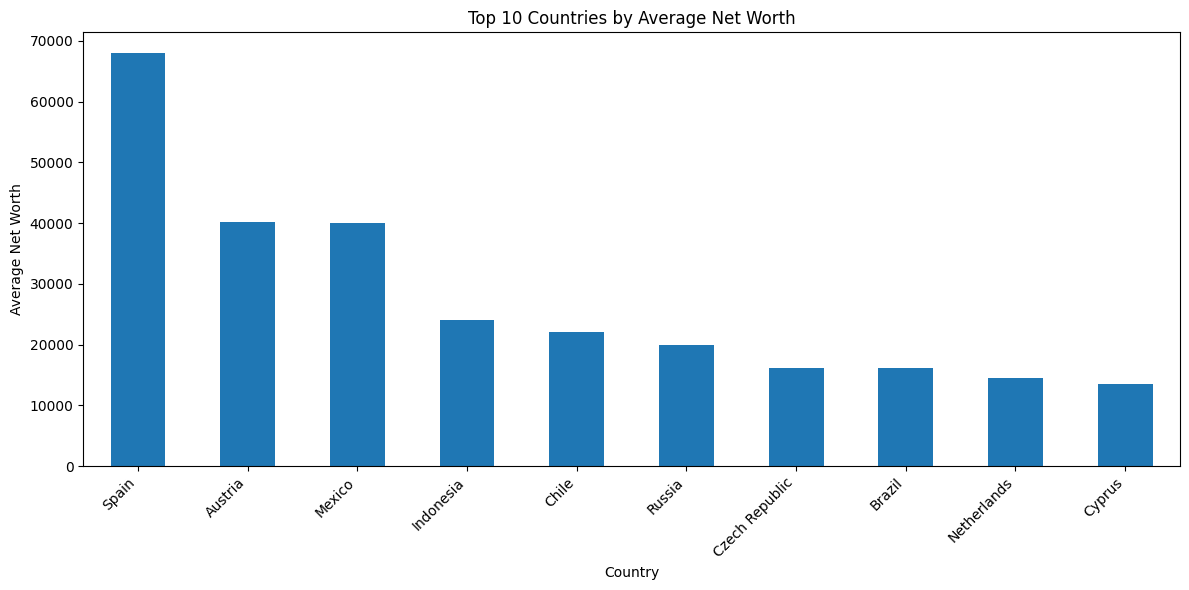

In [208]:
# What is top Countries By Average Net Worth?

# Group by country and calculate the average net worth
average_net_worth_by_country = df_merged_clean.groupby('country_x')['final_worth'].mean().sort_values(ascending=False)

# Display the top countries
print(average_net_worth_by_country.head(10))

# Create a bar plot
plt.figure(figsize=(12, 6))
average_net_worth_by_country.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Average Net Worth')
plt.xlabel('Country')
plt.ylabel('Average Net Worth')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

## *2 - Research question:* Top Countries by Average Net Worth:

1.  Spain: The highest average net worth (~87.5 billion USD). This is likely influenced by a small sample of ultra-high-net-worth individuals.

2.  Austria: High average net worth (~45.6 billion USD), potentially reflecting a few wealthy individuals skewing the average.

3.  Mexico, Indonesia, and Chile follow, all averaging above 20 billion USD.

## Observations:

* Smaller countries with specific economic niches (e.g., Cyprus, Monaco, Singapore) have relatively high average net worths.

* The United States, while having many wealthy individuals, has an average net worth (~7.5 billion USD) reflecting its broader wealth distribution.

## *3 - Research question:* What industries produce the most billionaires?


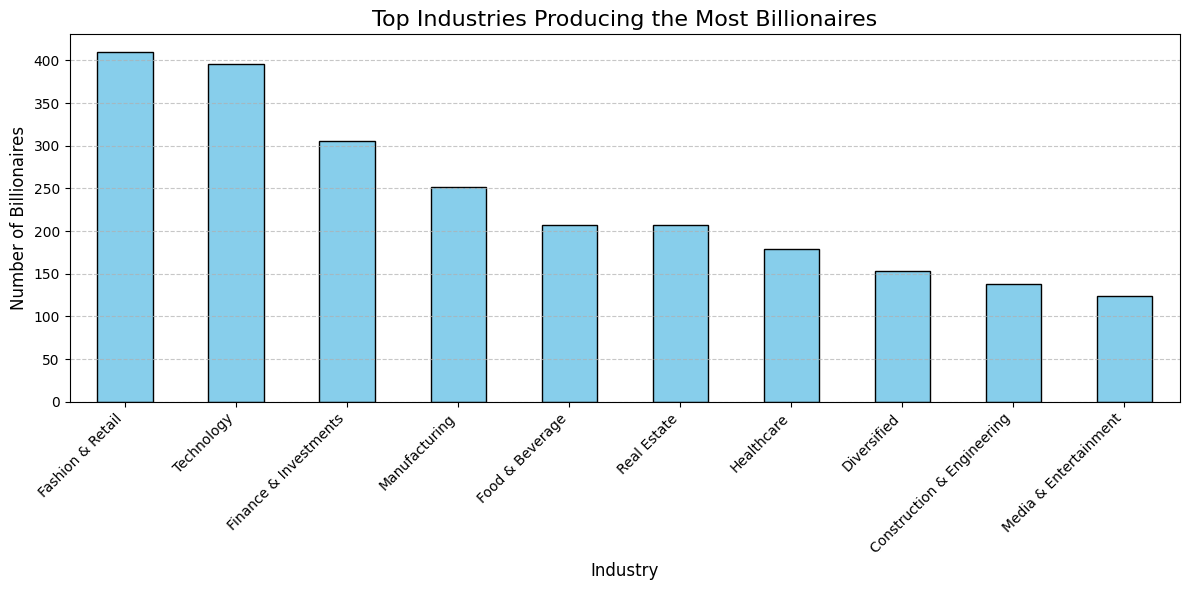

In [209]:
import matplotlib.pyplot as plt

# Prepare data for visualization
industry_counts = df_merged_clean['industry'].value_counts()
top_industries = industry_counts.head(10)

# Create a bar chart for the top industries
plt.figure(figsize=(12, 6))
top_industries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Industries Producing the Most Billionaires', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the chart
plt.show()


Finance, technology, and manufacturing dominate as the top industries producing billionaires, reflecting the power of investments, innovation, and tangible goods. Fashion, food, real estate, and healthcare also significantly contribute, showcasing resilience and diversity in wealth creation.

## **Observations from the Chart:**
1. **Leading Industries:**
Finance & Investments once again leads with the highest number of billionaires, emphasizing the role of financial markets, asset management, and investments in wealth creation.

2. **Technology:**
A close second, reflecting the transformative power of innovation, software development, and digital platforms in generating significant wealth.

3. **Manufacturing:**
Continues to hold a strong position, demonstrating the enduring importance of industrial production and tangible goods in wealth accumulation.

4. **Fashion & Retail:**
Highlights the profitability of consumer-focused businesses, including luxury brands and retail chains.

5. **Food & Beverage:**
Stands out as a reliable wealth creator, linked to the global demand for essential goods and hospitality industries.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

**Answer:**
If I had more time, I would focus on addressing data quality issues, such as inconsistencies in country naming conventions and ensuring all numeric fields are clean and free of anomalies. I would also investigate the impact of industry-specific factors on net worth, exploring whether certain industries consistently generate higher wealth. Additionally, I would analyze regional economic indicators (e.g., GDP per capita) to assess their influence on individual wealth and examine disparities across countries. Finally, I would explore temporal trends to identify how wealth changes over time within and across demographics.